In [262]:
import sys
from pathlib import Path

sys.path.append(str(Path().resolve().parent))  # parent of examples -> project root

In [263]:
import numpy as np
import matplotlib.pyplot as plt
import sympy
import PhysicsTool as pt

## Generateing fake example data

<ErrorbarContainer object of 3 artists>

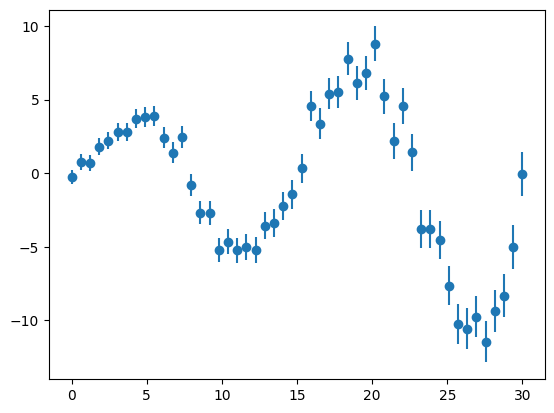

In [264]:
x = np.linspace(0, 30, 50)
std = np.linspace(0.5, 1.5, len(x))
y = np.sin(x*0.41343)*(2.34+x*0.298457) + np.random.normal(0, std, x.shape)

plt.errorbar(x, y, std, fmt= 'o', label='Fake Data')

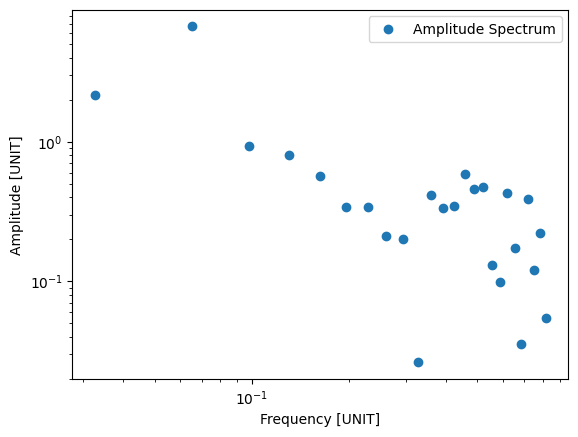

Max frequency: 0.065 [UNIT]


In [265]:
freq, amp = pt.filter.amplitude_spectrum(y, d = x[1] - x[0])
plt.scatter(freq, amp, label='Amplitude Spectrum')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Frequency [UNIT]')
plt.ylabel('Amplitude [UNIT]')
plt.legend()
plt.show()


max_freq = freq[np.argmax(amp)]
print(f'Max frequency: {max_freq:.3f} [UNIT]')


In [266]:
a_0, a_1, a_2, x_ = sympy.symbols('a_0 a_1 a_2 x')
functional_model_expr = sympy.sin(x_*a_0) * (a_1 + a_2 * x_)

f = pt.SympyFunctionalModel(functional_model_expr, [a_0, a_1, a_2], x_)

sigma_0 = 1.0
weights_matrix = np.diag(1.0 / (sigma_0 * y)**2)

f.parameters = np.array([2*np.pi*max_freq,1,4])  # Initial guess for parameters a_0 and a_1

f.fit(x, y, weights_matrix)


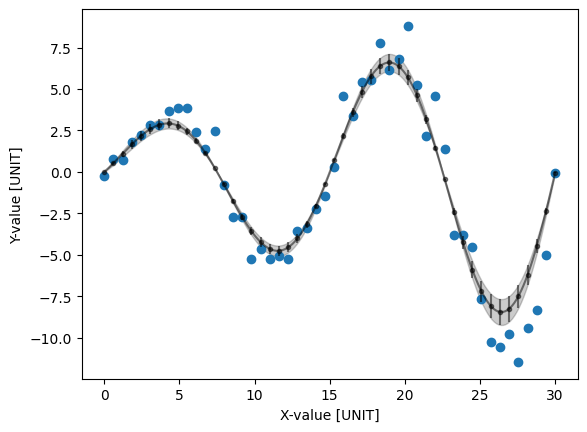

In [ ]:
plt.figure()
plt.plot(x, y, 'o', label='Data')
f.plot_prediction()
f.plot_prediction_smooth()
plt.xlabel('X-value [UNIT]')
plt.ylabel('Y-value [UNIT]')
plt.show()

In [268]:
chi2_thresh = f.chi2_threshold(0.05)
chi2_stat = f.m_0**2 / sigma_0**2

print(f'statistic : {chi2_stat:.3f}, threshold : {chi2_thresh:.3f}')
print('The model passes the test' if chi2_stat<chi2_thresh else 'the model failes the test')

statistic : 0.179, threshold : 1.362
The model passes the test


a_0 = 0.419 ± 0.000
a_1 = 1.939 ± 0.408
a_2 = 0.247 ± 0.039


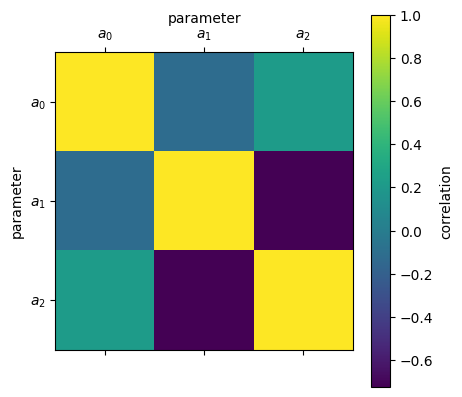

In [269]:
f.print_parameters()
f.show_correlation()

In [270]:
# what is the scale at x = 4 ?

scale_expr = 4 * a_2 + a_1
scale_val, scale_cov = pt.propagate_error(scale_expr, f.parameter_symbols, f.parameters, f.m_0**2 * f.parameter_cof())

print(f'scale at x = 4: {scale_val:.3f} ± {scale_cov[0,0]**0.5:.3f}')

scale at x = 4: 2.927 ± 0.313
